In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Loading my data
data=pd.read_csv('../DataFP/dataOK.csv')


C:\Users\garciaer\AppData\Local\Temp\ipykernel_9188\1052940221.py:7: DtypeWarning: Columns (4,5,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../DataFP/dataOK.csv')


In [54]:
#Checking the content of my data file
columns = list(data.columns)

#Extracting just the data I will use for the labeling, meaning the values of Sr, Nd and Pb
columnSrNd= ['sr87_sr86','nd143_nd144']
dataSrNd= data[columnSrNd].dropna()
dataSrNd.to_csv('../DataFP/dataSrNd.csv')

columnPb= ['pb206_pb204','pb207_pb204']
dataPb = data[columnPb].dropna()
dataPb.to_csv('../DataFP/dataPb.csv')


In [55]:
#Calculating the middle point of the End_members mantle source fields for labeling. The values are based on the book "Principles of
#Igneous and Metamorphic Petrology, John D. Winter Second Edition"", page 269, Table 5, Figure 8 and Figure 9.
#Code is provided to label the data based on the 143Nd/144Nd versus 87Sr/86Sr plot or the 143Nd/144Nd versus 87Sr/86Sr plot
#For this excercise I label my data based on only the 143Nd/144Nd versus 87Sr/86Sr plot

#middle point of the DM field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_DM = (0.7015 + 0.7027) / 2
Nd_DM = (0.51325 + 0.51360) / 2
mp_DM_SrNd= [Sr_DM, Nd_DM]

#middle point of the HIMU field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_HIMU = (0.7026+0.7032) / 2
Nd_HIMU = (0.51285+0.51295) / 2
mp_HIMU_SrNd= [Sr_HIMU, Nd_HIMU]

#middle point of the EMI field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_EMI = (0.7057+0.7040) / 2
Nd_EMI = (0.5123+0.5122) / 2
mp_EMI_SrNd= [Sr_EMI, Nd_EMI]

#no EMII field in 143Nd/144Nd versus 87Sr/86Sr plot

#middle point of the BSE field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_BSE = (0.7045+0.7051) / 2
Nd_BSE = (0.51268+0.51258) / 2
mp_BSE_SrNd= [Sr_BSE, Nd_BSE]

#middle point of the PREMA field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_PREMA = (0.7035+0.7034) / 2
Nd_PREMA = (0.51295+0.51301) / 2
mp_PREMA_SrNd= [Sr_PREMA, Nd_PREMA]

#middle point of the DM field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_DM = (15.5+17.7) / 2
#Pb7_DM = (15.35+15.45) / 2
#mp_DM_Pb= [Pb6_DM, Pb7_DM]

#middle point of the HIMU field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_HIMU = (21.2+21.7) / 2
#Pb7_HIMU = (15.8+15.9) / 2
#mp_HIMU_Pb= [Pb6_HIMU, Pb7_HIMU]

#middle point of the EMI field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_EMI = (16.5+17) / 2
#Pb7_EMI = (15.46+15.52) / 2
#mp_EMI_Pb= [Pb6_EMI, Pb7_EMI]

#middle point of the EMII field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_EMII = (18.70+19.30) / 2
#Pb7_EMII = (15.77+15.70) / 2
#mp_EMII_Pb= [Pb6_EMII, Pb7_EMII]

#middle point of the BSE field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_BSE = (17.7+18.3) / 2
#Pb7_BSE = (15.7+15.52) / 2
#mp_BSE_Pb= [Pb6_BSE, Pb7_BSE]

#middle point of the PREMA field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_PREMA = (18.3+18.6) / 2
#Pb7_PREMA = (15.5+15.45) / 2
#mp_PREMA_Pb= [Pb6_PREMA, Pb7_PREMA]


ALLmpSrNd=[mp_DM_SrNd, mp_HIMU_SrNd, mp_EMI_SrNd, mp_BSE_SrNd, mp_PREMA_SrNd]

#ALLmpPb=[mp_DM_Pb, mp_HIMU_Pb, mp_EMI_Pb, mp_BSE_Pb, mp_PREMA_Pb, mp_EMII_Pb]

In [58]:
#Labeling my data based on the nearest end-member field. 

#Calculating the euclidean distance between two points
def distance(p1, p2):
    p1 = p1.values.tolist()
    p1[0] = float(p1[0])
    p1[1] = float(p1[1])    
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def weighted_distance(p1, p2, weight):
    p1 = p1.values.tolist()
    p1[0] = float(p1[0])
    p1[1] = float(p1[1])    
    return weight * np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

#Function to apply the distance function to each row of my data to label it. 
def find_nearest(row, centers, weighted=False):
    if len(centers)==5:  #5 because in the 143Nd/144Nd versus 87Sr/86Sr plot there are 5 end-members:  DM, HIMU, EMI, BSE and PREMA
        #The weigths has been asigned based on the area of each end-member field relative to the area of the other fields. For example, the area of the DM field is the biggest compared to the other fields. 
        #The weights are subjective values and can be changed which will also change the label itself and the amount of data in each end-member field. This needs to be improve.
        weights = [7,3,5,5,2]  
        weights = [1/w for w in weights]
        #print('SrNd')
    elif len(centers)==6: #6 because in the 207Pb/204Pb versus 206Pb/204Pb plot there are 6 end-members:  DM, HIMU, EMI,BSE, PREMA and EMII
        weights = [5,3,2,4,1,2] #[DM, HIMU, EMI, BSE, PREMA, EMII]
        weights = [1/w for w in weights]
        #print("Pb")
    else:
        raise ValueError("Error in find nearest")
    
    if weighted:
        distances= [weighted_distance(row, p, w) for p,w in zip(centers, weights)] 
    else:
        distances= [distance(row, p) for p in centers] 
    distances=np.array(distances)    
    return distances.argmin()

#Labeling based on the 143Nd/144Nd versus 87Sr/86Sr plot
weighted = True #True always as we wanted to consider the area of the field, meaning that my data will be labeled on which field is the closest, not which mid-point. 
if weighted:
    #Applying the function to each row of my data to label
    labelSrNd_w = dataSrNd.apply(lambda x: find_nearest(x, ALLmpSrNd, weighted=True), axis=1)
    labelSrNd_w = labelSrNd_w.rename('labelSrNd')
    labelSrNd_w.to_csv('../DataFP/labelSrNd_w.csv',index=True)

else:
    #Applying the function to each row of my data to label
    labelSrNd = dataSrNd.apply(lambda x: find_nearest(x, ALLmpSrNd), axis=1)
    labelSrNd = labelSrNd.rename('labelSrNd')
    labelSrNd.to_csv('../DataFP/labelSrNd.csv',index=True)

print(labelSrNd_w)
print(len(labelSrNd_w))


#Labeling based on 207Pb/204Pb versus 206Pb/204Pb plot
#weighted = True
#if weighted:
    #Apply the function to each row of my data to label
    #labelPb_w = dataPb.apply(lambda x: find_nearest(x, ALLmpPb, weighted=True), axis=1)
    #labelPb_w = labelPb_w.rename('labelPb')
    #labelPb_w.to_csv('../DataFP/labelPb_w.csv',index=False)

#else:
    #Apply the function created in Nd, Sr to each row of my data to label
    #labelPb= dataPb.apply(lambda x: find_nearest(x, ALLmpPb), axis=1)
    #labelPb= labelPb.rename('labelPb')
    #labelPb.to_csv('../DataFP/labelPb.csv',index=False)



9         3
12        3
13        3
34        3
39        3
         ..
253977    1
253978    1
253979    1
253980    1
253981    1
Name: labelSrNd, Length: 15921, dtype: int64
15921


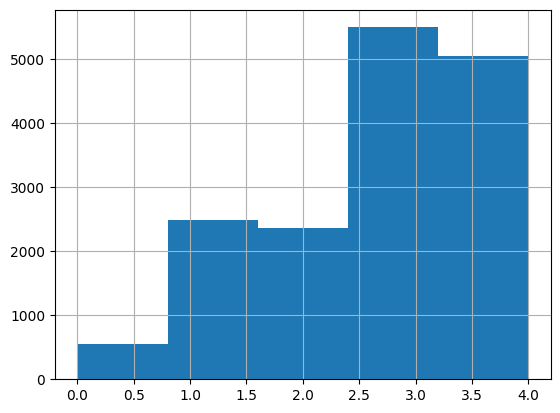

Bin 0.0 - 0.8: 543
Bin 0.8 - 1.6: 2478
Bin 1.6 - 2.4000000000000004: 2356
Bin 2.4000000000000004 - 3.2: 5493
Bin 3.2 - 4.0: 5051


In [62]:
#Histogram of end-members mantle source based on 143Nd/144Nd versus 87Sr/86Sr plot to know how much data for each label (class) I have and compare with the figure where I plot by myself the data on the 143Nd/144Nd versus 87Sr/86Sr plot given in the mentioned book.
#5 mantle end-members (DM, HIMU, EMI, BSE, PREMA), no EMII
labelSrNd_w.hist(bins=5)  
plt.show()
hist, bins = np.histogram(labelSrNd_w, bins=5)  

# Print the frequency/count of each bin
for i in range(len(hist)):
    print(f"Bin {bins[i]} - {bins[i+1]}: {hist[i]}")


#Histogram of end-members mantle source based on the 207Pb/204Pb versus 206Pb/204Pb plot to know how much data for each label (class) I have and compare with the figure where I plot by myself the data on the 207Pb/204Pb versus 206Pb/204Pb plot given in the mentioned book.
#6 mantle end-members (DM, HIMU, EMI, BSE, PREMA and EMII)
#labelPb_w.hist(bins=6)  
#plt.show()
#hist, bins = np.histogram(labelPb_w, bins=5) 

# Print the frequency/count of each bin
#for i in range(len(hist)):
#    print(f"Bin {bins[i]} - {bins[i+1]}: {hist[i]}")




In [ ]:
#Concatenation of all the data with the corresponding labels based on Sr, Np and Pb values. 

#if weighted:
#    labels_end_members_w=pd.concat([labelPb_w,labelSrNd_w],axis=1)
#    labels_end_members_w.to_csv('../DataFP/labels_end_members_w.csv')
#    print(len(labels_end_members_w))
# else:
#    labels_end_members=pd.concat([labelPb,labelSrNd],axis=1)
#    labels_end_members.to_csv('../DataFP/labels_end_members.csv')
#    print(len(labels_end_members))
    

#One data set where the labels given by the Pb and Sr-Nd values are the same, meaning the rock sample plot in the (or near by) the same end-member field in both plots:207Pb/204Pb versus 206Pb/204Pb and 143Nd/144Nd versus 87Sr/86Sr.
# if weighted:
#    same_mantle_source_w= labels_end_members_w.loc[labels_end_members_w['labelPb'] == labels_end_members_w['labelSrNd']]
#    print(len(same_mantle_source_w))
#    same_mantle_source_w.to_csv('../DataFP/same_mantle_source_w.csv')
# else:
#    same_mantle_source= labels_end_members.loc[labels_end_members['labelPb'] == labels_end_members['labelSrNd']]
#    print(len(same_mantle_source))
#    same_mantle_source.to_csv('../DataFP/same_mantle_source.csv')

#same_mantle_source.hist(bins=5)  
#plt.show()

#same_mantle_source_w.hist(bins=5)  
#plt.show()

In [64]:
#Contenating the labels to the corresponding rock samples. 
labeled_mantle_source=pd.merge(labelSrNd_w,data,left_index=True, right_index=True)
#print(labeled_mantle_source)
print(len(labeled_mantle_source))
labeled_mantle_source.to_csv('../DataFP/labeled_mantle_source.csv',index=False)
columns_labeled_mantle_source=list(labeled_mantle_source.columns)
#print(columns_labeled_mantle_source)

15921


In [74]:
#Creating a new daa set where I have just the features that I consider relevant. 
labeled_MS=labeled_mantle_source.drop(columns=['sample_id', 'sample_name','qap_name', 'rock_type','rock_group', 'rock_origin', 'loi'])
columns_labeled_MS=list(labeled_MS.columns)
print(columns_labeled_MS)
num_col_labeled_MS=labeled_MS.shape[1]
print(num_col_labeled_MS)


['labelSrNd', 'latitude', 'longitude', 'rb87_sr86', 'rb87_sr87', 'sr87_sr86', 'nd143_nd144', 'sm147_nd144', 'pb206_pb204', 'pb207_pb204', 'pb208_pb204', 'u238_pb204', 'sio2', 'tio2', 'al2o3', 'cr2o3', 'fe2o3', 'fe2o3_tot', 'feo', 'feo_tot', 'mgo', 'cao', 'mno', 'nio', 'k2o', 'na2o', 'sro', 'p2o5', 'h2o_plus', 'h2o_minus', 'h2o_tot', 'co2', 'so3', 'bao', 'caco3', 'mgco3', 'f_ppm', 'cl_ppm', 'br_ppm', 'i_ppm', 'h_ppm', 'c_ppm', 'n_ppm', 'p_ppm', 's_ppm', 'al_ppm', 'as_ppm', 'ag_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm', 'bi_ppm', 'ca_ppm', 'cd_ppm', 'ce_ppm', 'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'er_ppm', 'eu_ppm', 'fe_ppm', 'ga_ppm', 'gd_ppm', 'ge_ppm', 'hf_ppm', 'hg_ppm', 'ho_ppm', 'in_ppm', 'ir_ppm', 'k_ppm', 'la_ppm', 'li_ppm', 'lu_ppm', 'mg_ppm', 'mn_ppm', 'mo_ppm', 'na_ppm', 'nd_ppm', 'ni_ppm', 'nb_ppm', 'os_ppm', 'pa_ppm', 'pb_ppm', 'pd_ppm', 'pm_ppm', 'pr_ppm', 'pt_ppm', 'rb_ppm', 're_ppm', 'rh_ppm', 'ru_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm', 'si_ppm', 'sm_ppm', 'sn_p

In [75]:
# Calculating the percentage of NaN values in each column so I can chose which features I should erase as there is no enough data
# Drop columns with more than x% NaN values, note it is a percentage no a value (I said it wrong during the presentation)
threshold = 80  # Will erase the feature if more than x% of the values are NaN (no data available)
final_data = labeled_MS.dropna(thresh=len(labeled_MS) - threshold/100*len(labeled_MS), axis=1)
num_col_final_data=final_data.shape[1]
print(num_col_final_data)
columns_final_data=list(final_data.columns)
print(columns_final_data)
print(len(final_data))

#Data set to be used in the Model file.
final_data.to_csv('../DataFP/final_data.csv',index=False)



55
['labelSrNd', 'latitude', 'longitude', 'rb87_sr86', 'sr87_sr86', 'nd143_nd144', 'sm147_nd144', 'pb206_pb204', 'pb207_pb204', 'pb208_pb204', 'sio2', 'tio2', 'al2o3', 'fe2o3', 'fe2o3_tot', 'mgo', 'cao', 'mno', 'k2o', 'na2o', 'p2o5', 'ba_ppm', 'ce_ppm', 'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'er_ppm', 'eu_ppm', 'ga_ppm', 'gd_ppm', 'hf_ppm', 'ho_ppm', 'la_ppm', 'lu_ppm', 'nd_ppm', 'ni_ppm', 'nb_ppm', 'pb_ppm', 'pr_ppm', 'rb_ppm', 'sc_ppm', 'sm_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm', 'tm_ppm', 'v_ppm', 'u_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']
15921


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<A

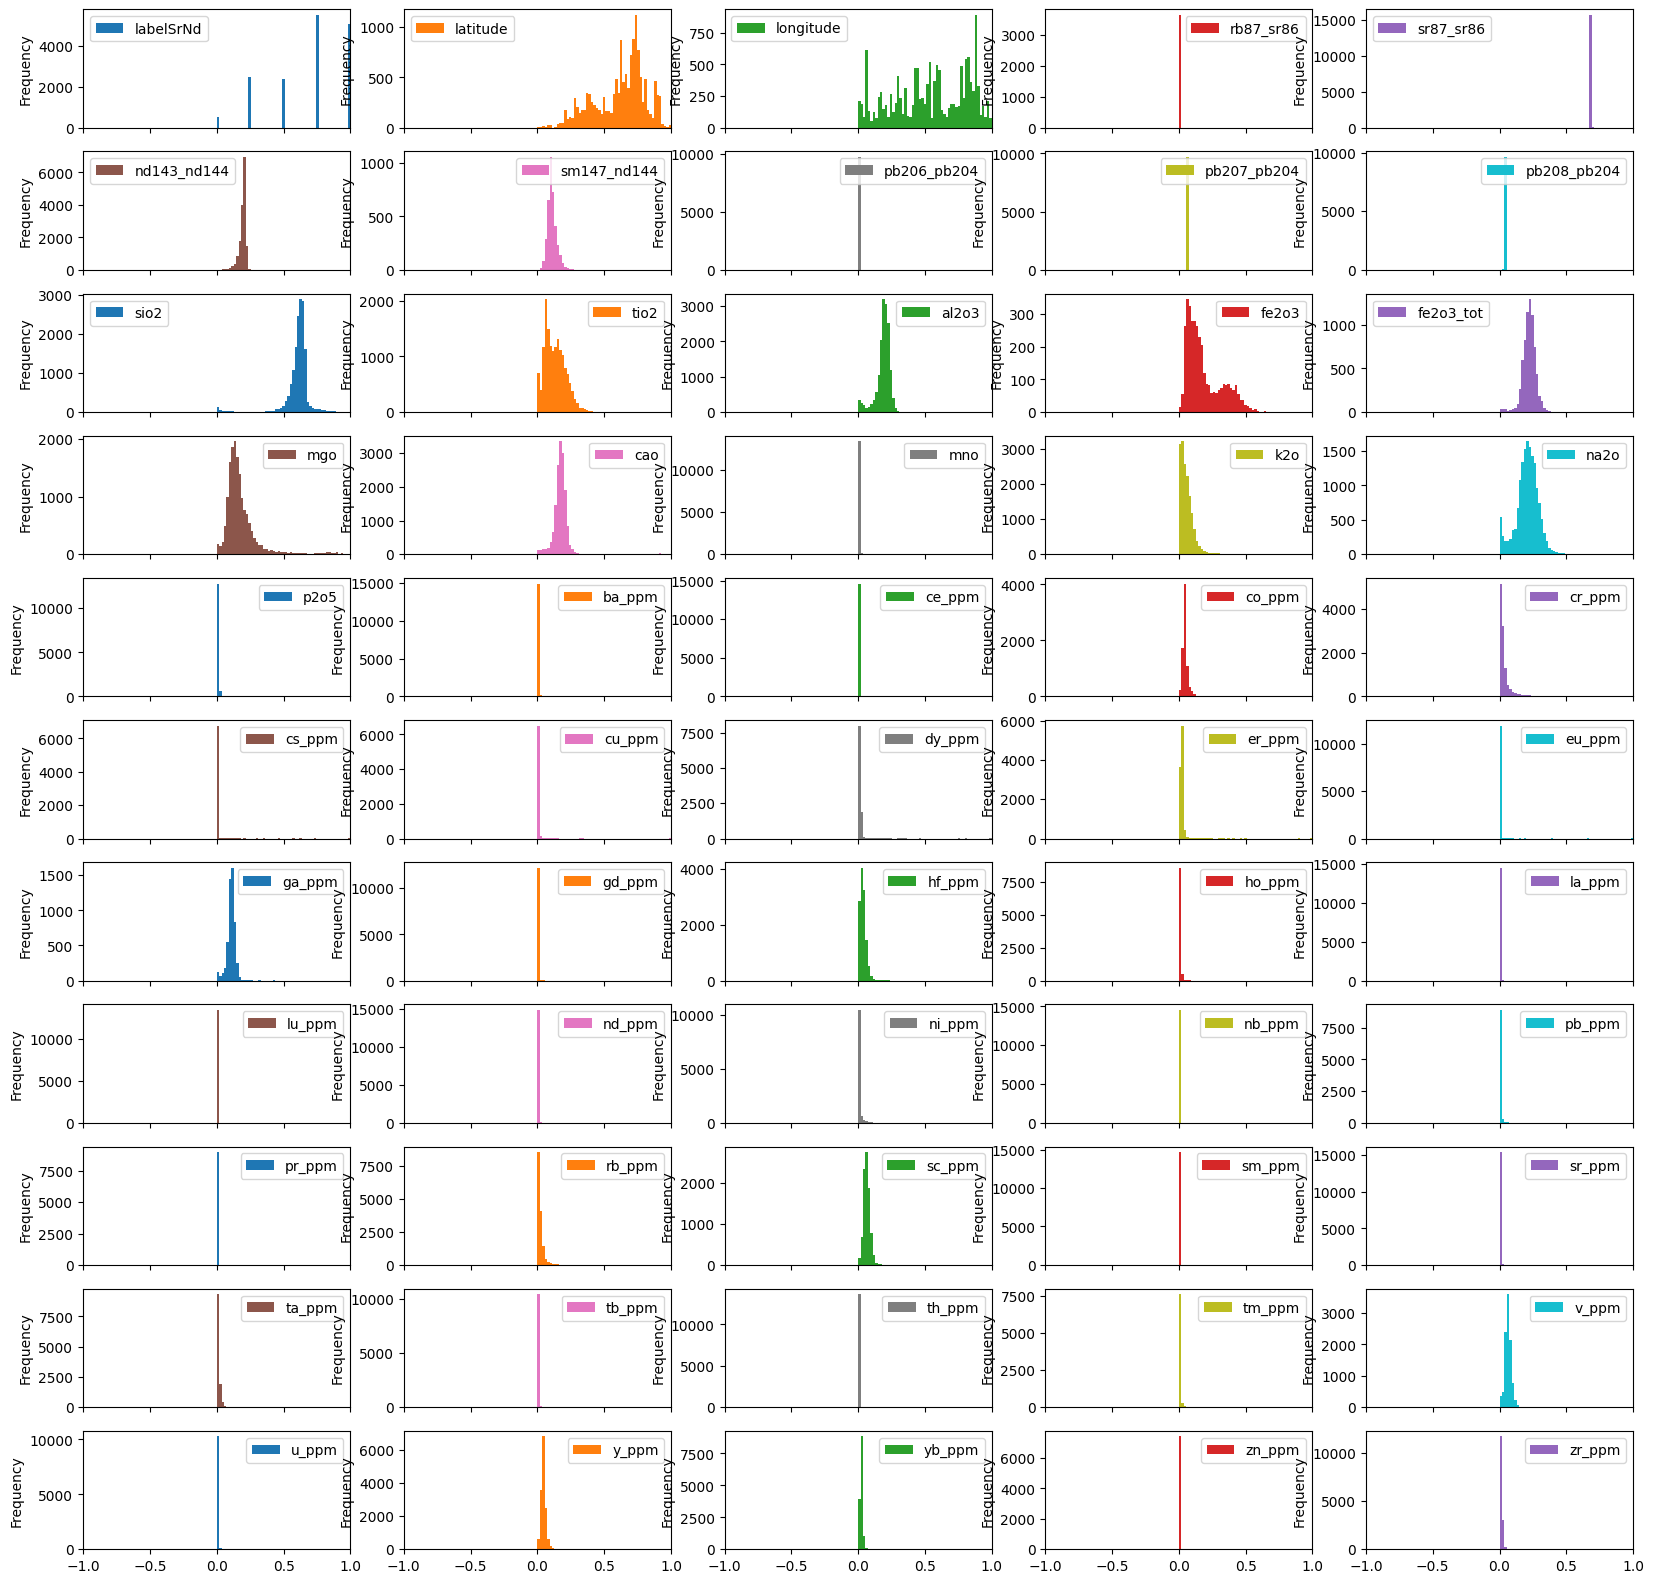

In [82]:
#How my data is behaving (normal distribution?) in order to normalize my data later on for my model
normalized_final_data = (final_data - final_data.min()) / (final_data.max() - final_data.min())
normalized_final_data.plot.hist(subplots=True, layout=(11,5), figsize=(20,20), xlim=(-1,1), bins=55) #xlim can be changed depending on the feature limits
#In general results show a normal distribution for all the features